In [1]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

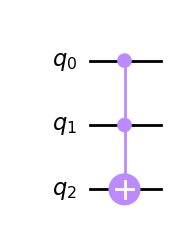

In [2]:
circ = QuantumCircuit(3)
circ.ccx(0, 1, 2)
circ.draw(output='mpl')

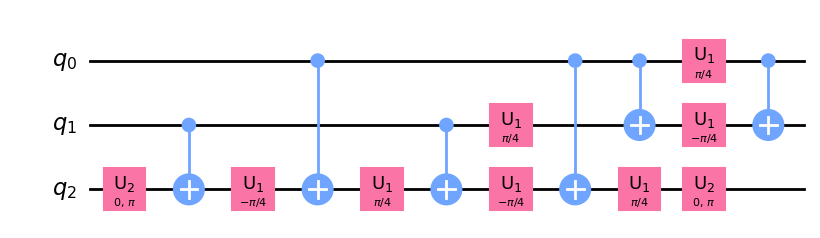

In [6]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circ)
new_circ.draw(output='mpl')

#qiskit.transpiler.passesから取得できる
from qiskit.transpiler import passes
[pass_ for pass_ in dir(passes) if pass_[0].isupper()]

In [10]:
#同じパスの異なる実装
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

circuit = QuantumCircuit(7)
circuit.h(3)
circuit.cx(0, 6)
circuit.cx(6, 0)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)

coupling_map = CouplingMap(couplinglist=coupling)

bs = BasicSwap(coupling_map=coupling_map)
pass_manager = PassManager(bs)
basic_circ = pass_manager.run(circuit)

ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(circuit)

ss = StochasticSwap(coupling_map=coupling_map)
pass_manager = PassManager(ss)
stochastic_circ = pass_manager.run(circuit)

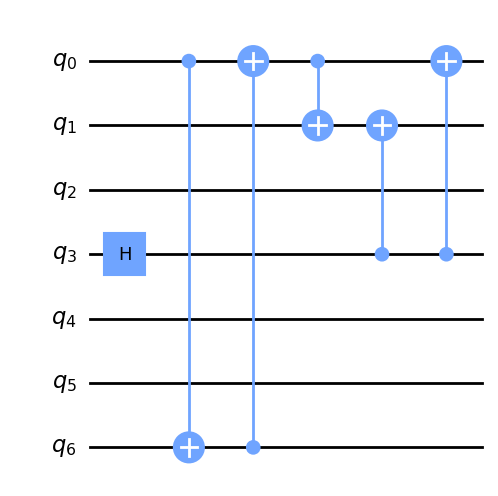

In [16]:
circuit.draw(output='mpl')

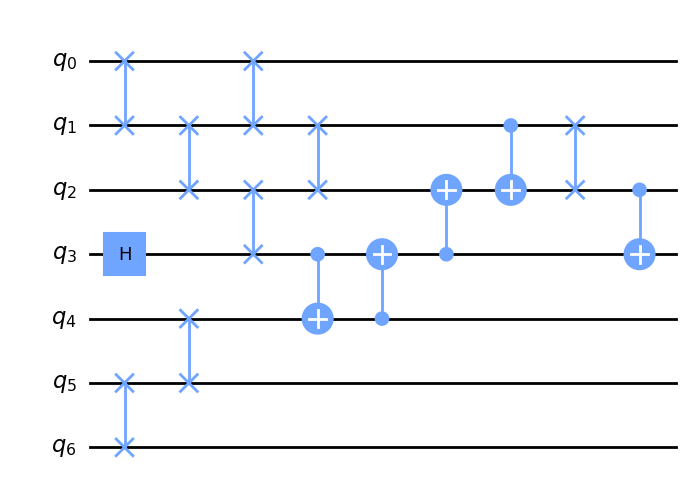

In [12]:
lookahead_circ.draw(output='mpl')

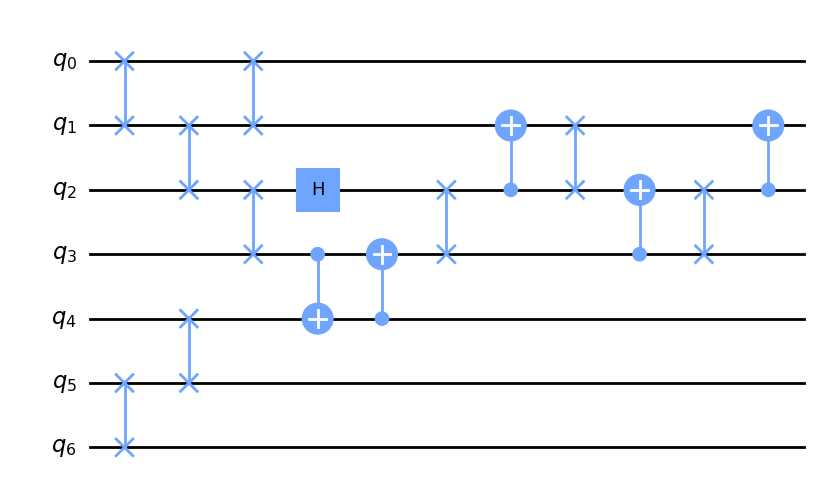

In [13]:
stochastic_circ.draw(output='mpl')

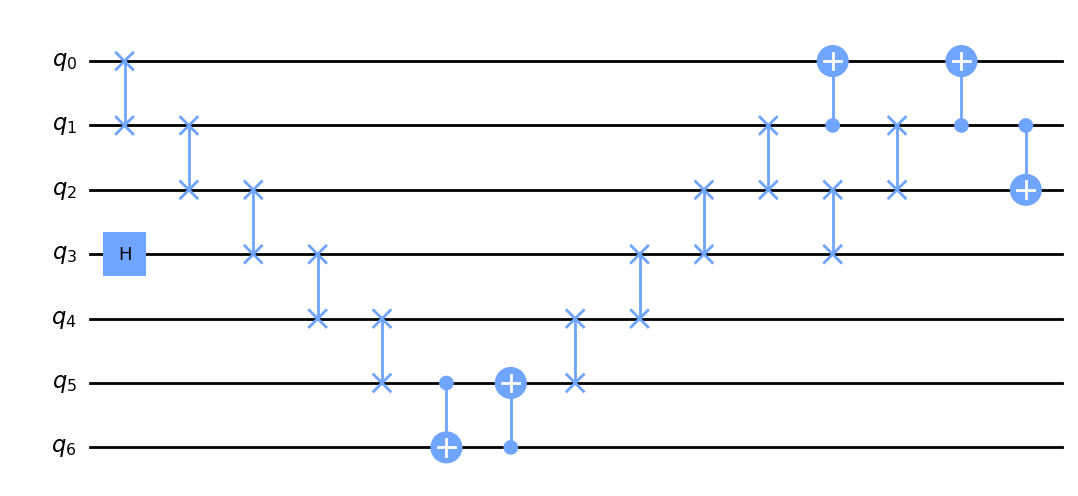

In [14]:
basic_circ.draw(output='mpl')

In [21]:
#プリセット　パスマネージャー
import math
from qiskit.providers.fake_provider import FakeTokyo

backend=FakeTokyo()

In [23]:
qc = QuantumCircuit(10)

random_state = [
    1 / math.sqrt(4) * complex(0,1),
    1 / math.sqrt(8) * complex(1,0),
    0,
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(8) * complex(1,0),
    1 / math.sqrt(8) * complex(0,1),
    0,
    0,
    0,
    0,
    1 / math.sqrt(4) * complex(1,0),
    1 / math.sqrt(8) * complex(1,0)]

qc.initialize(random_state, range(4))
qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
q_8: »
     »
q_9: »
     »
«     ┌────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                           ├
«     │                                                                            │
«q_1: ┤1                                                                           ├
«     │  Initialize(0.5j,0.35355,0,0,0,0,0,0,0.35355,0.35355j,0,0,0,0,0.5,0.35355) │
«q_2: ┤2                                                                           ├
«     │                                                                            │
«q_3: ┤3                                                                           ├
«     └────────────────────────────────────────────────────────────────────────────┘
«q_4: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_5: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_6: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_7: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_8: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_9: ──────────────────────────────────────────────────────────────────────────────
«

In [25]:
#異なる最適化
optimized_0 =transpile(qc, backend=backend, seed_transpiler=11, optimization_level=0)
print('gates = ', optimized_0.count_ops())
print('depth = ', optimized_0.depth())

gates =  OrderedDict([('cx', 70), ('u3', 15), ('u1', 15), ('reset', 4)])
depth =  87


In [26]:
optimized_1 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=1)
print('gates = ', optimized_1.count_ops())
print('depth = ', optimized_1.depth())

gates =  OrderedDict([('cx', 22), ('u3', 15), ('u1', 6)])
depth =  40


In [27]:
optimized_2 =transpile(qc, backend=backend,seed_transpiler=11, optimization_level=2)
print('gates =', optimized_2.count_ops())
print('depth =', optimized_2.depth())

gates = OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth = 38


In [30]:
optimized_3 =transpile(qc, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates =', optimized_3.count_ops())
print('depth =', optimized_3.depth())

gates = OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth = 38


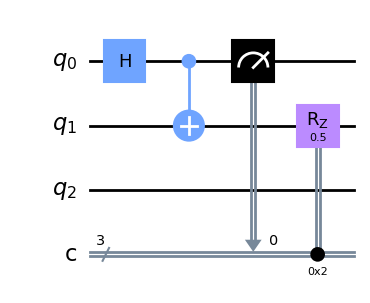

In [31]:
#有向非巡回グラフ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0],c[0])
circ.rz(0.5, q[1]).c_if(c,2)
circ.draw(output='mpl')